In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('src/data.csv', sep =';')
df['Target'] = df['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [7]:
# Check for missing values in all columns
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values = missing_values[missing_values > 0]
print(missing_values)

# check data types
# Show data types of all columns
print(df.dtypes)

Series([], dtype: int64)
Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                        

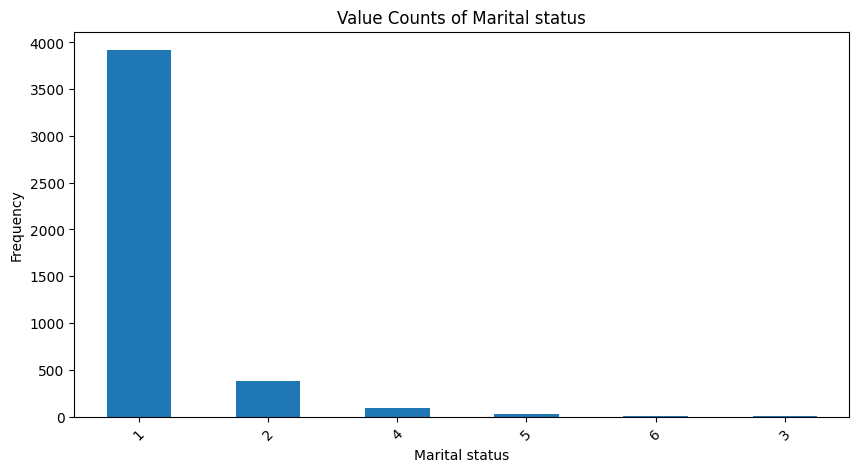

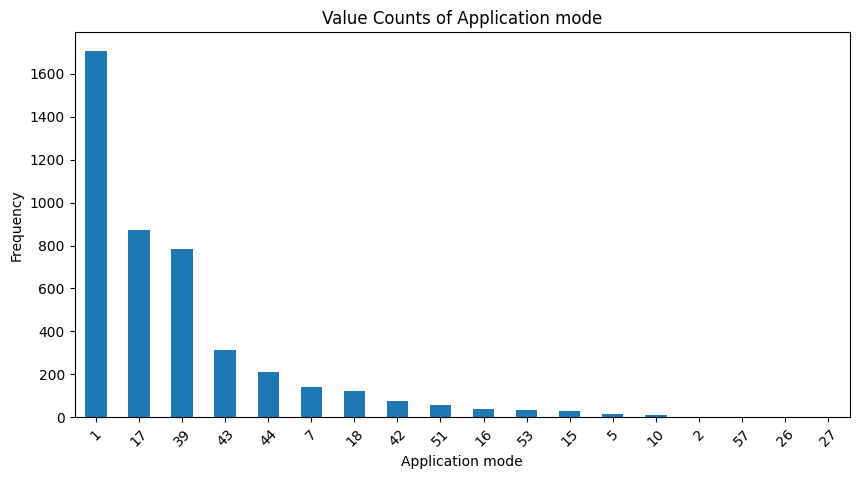

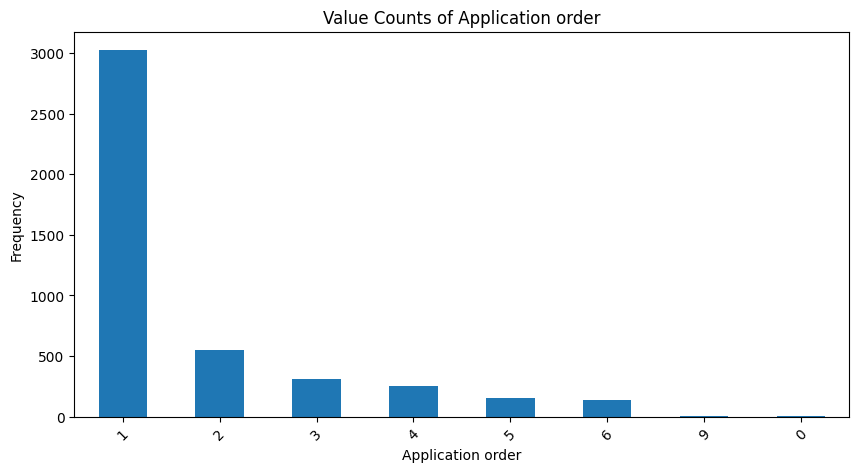

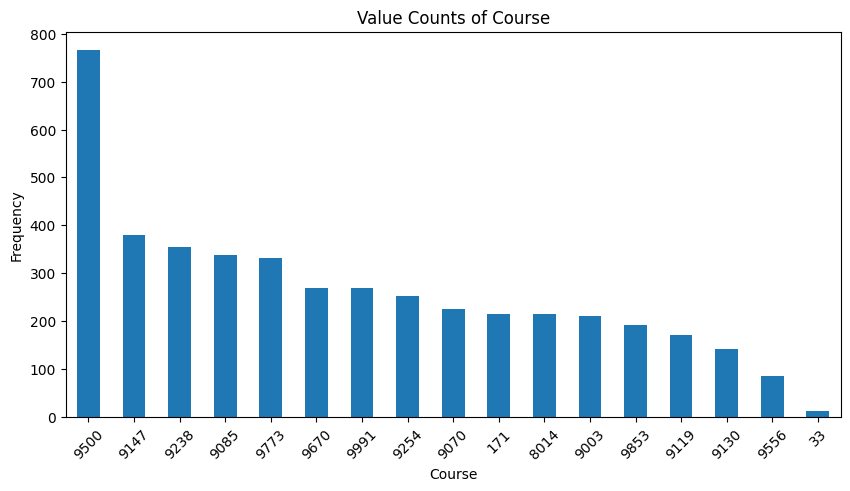

c:\Users\joack\Desktop\XAI\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


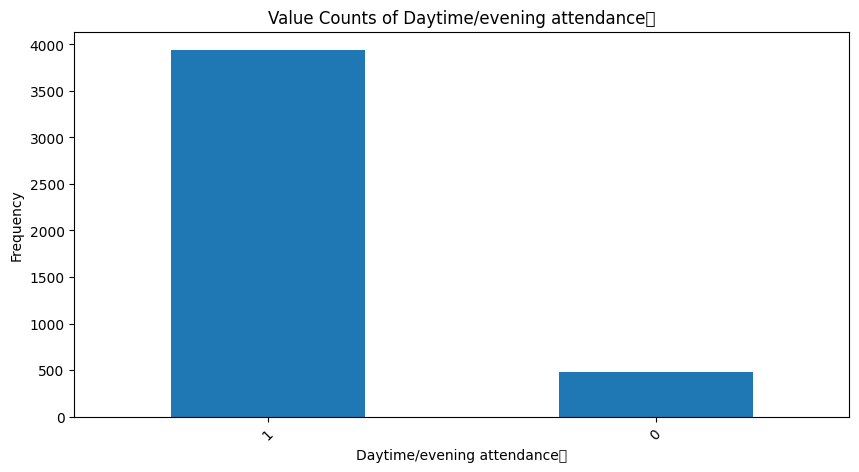

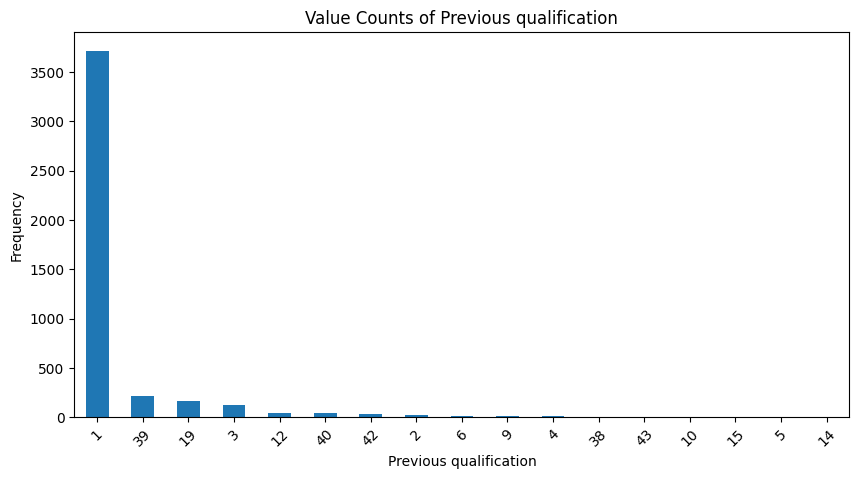

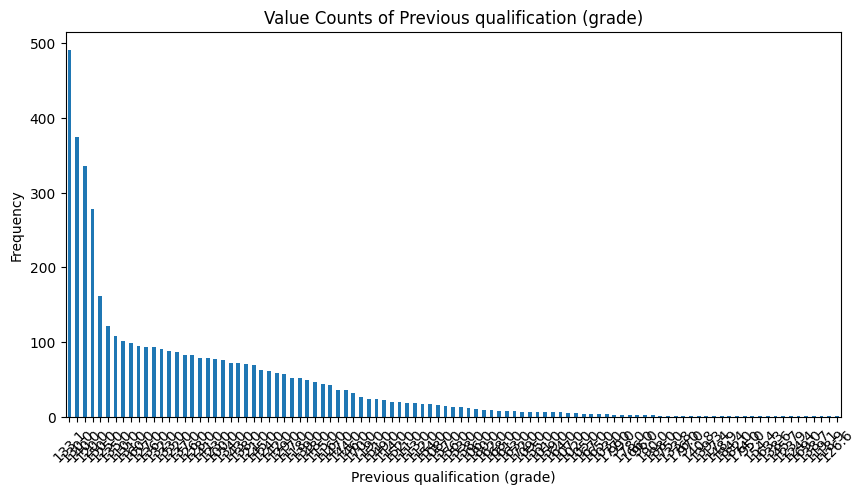

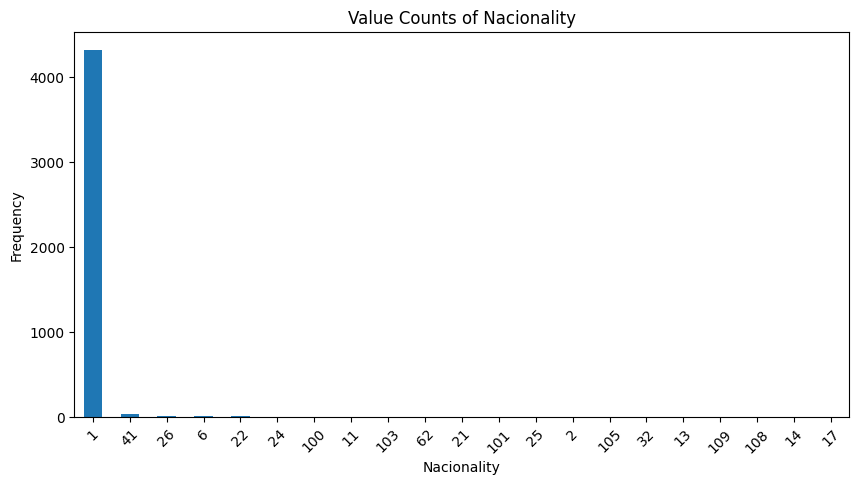

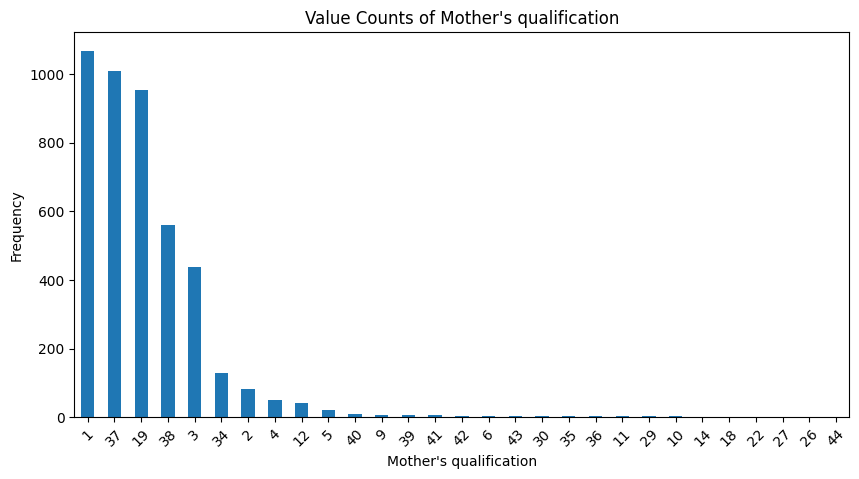

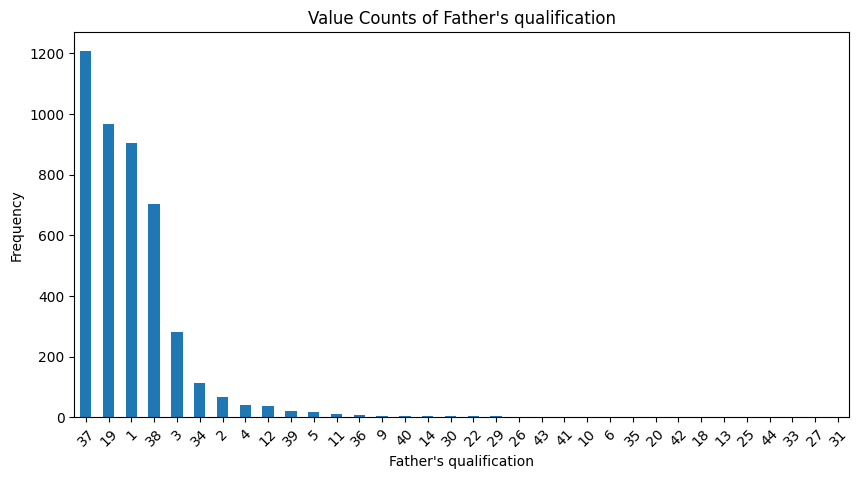

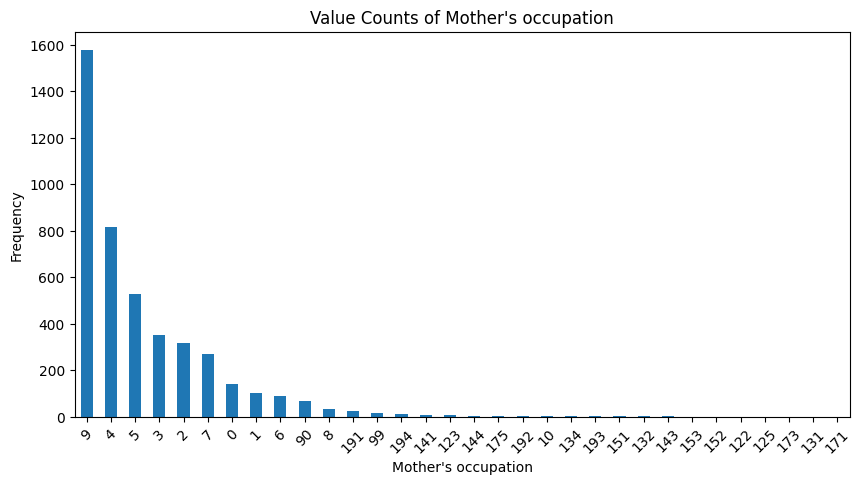

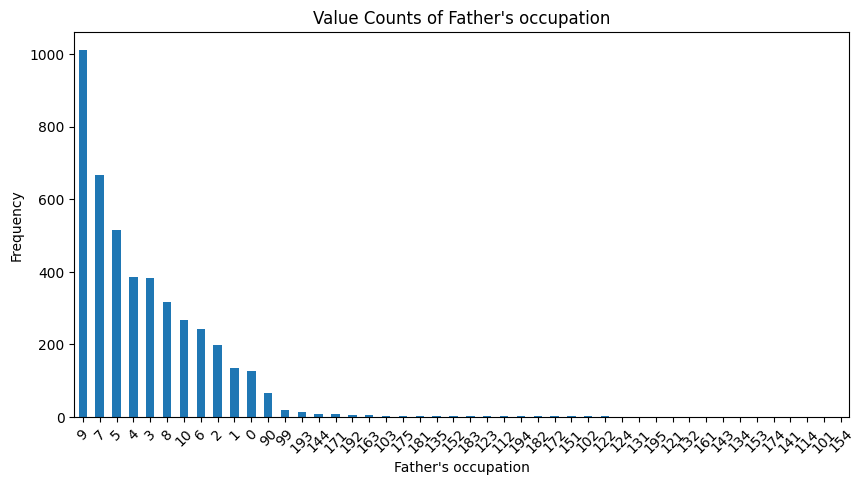

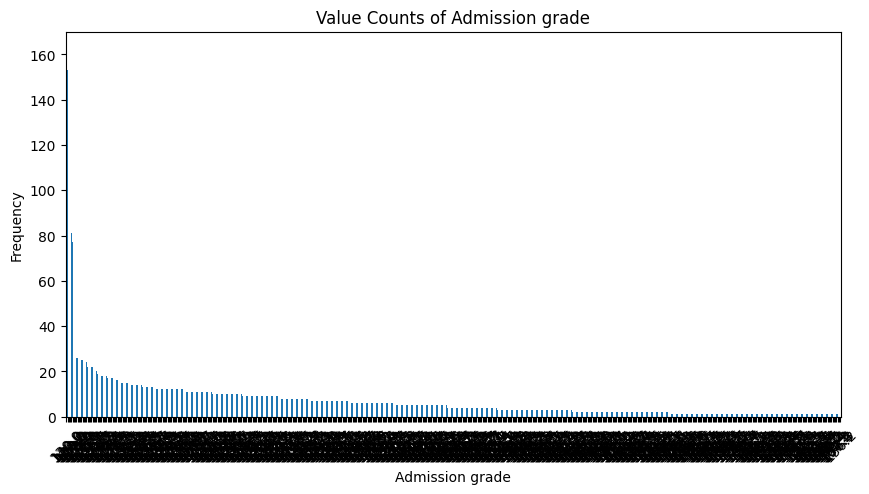

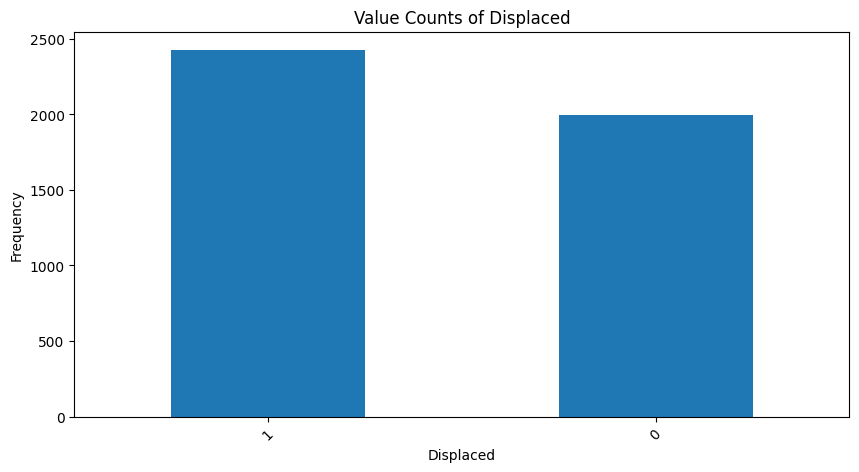

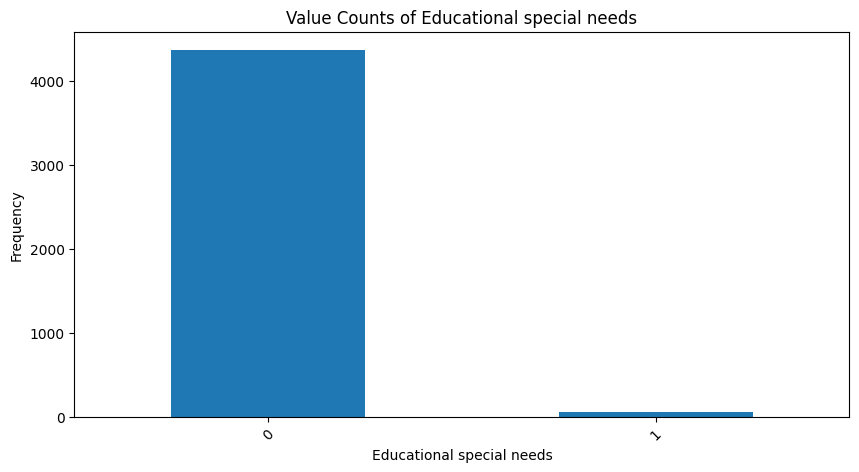

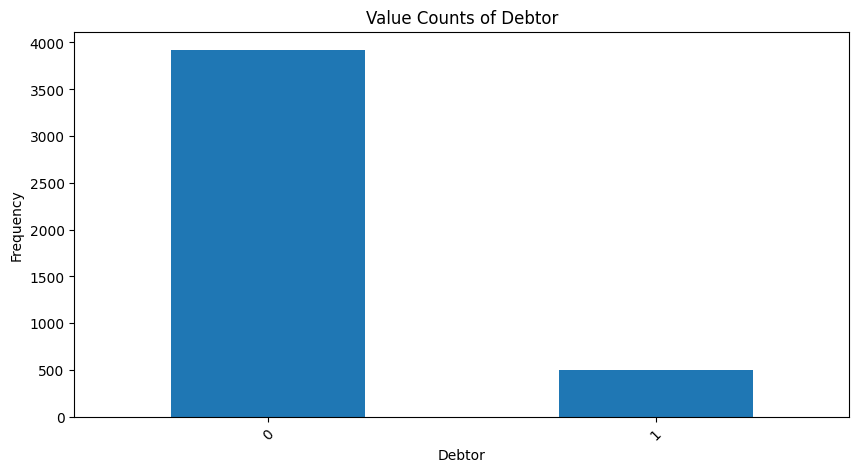

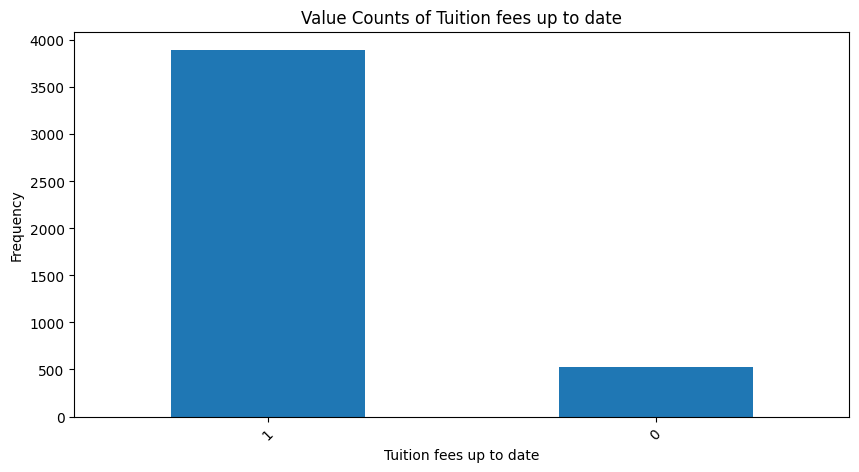

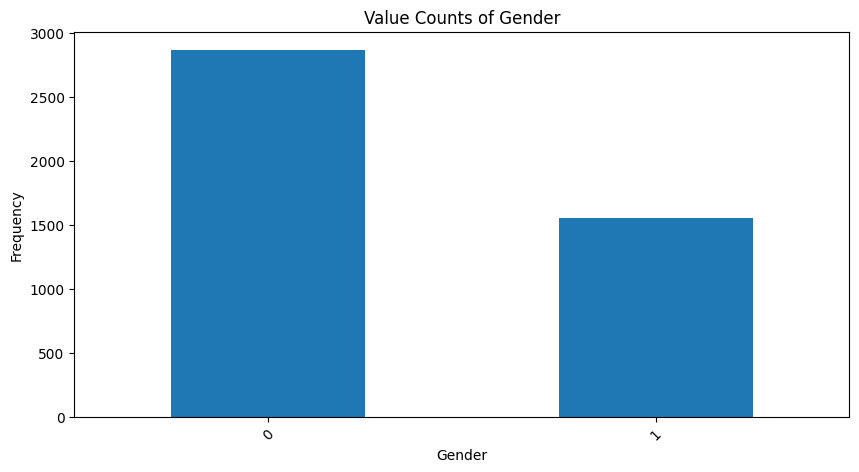

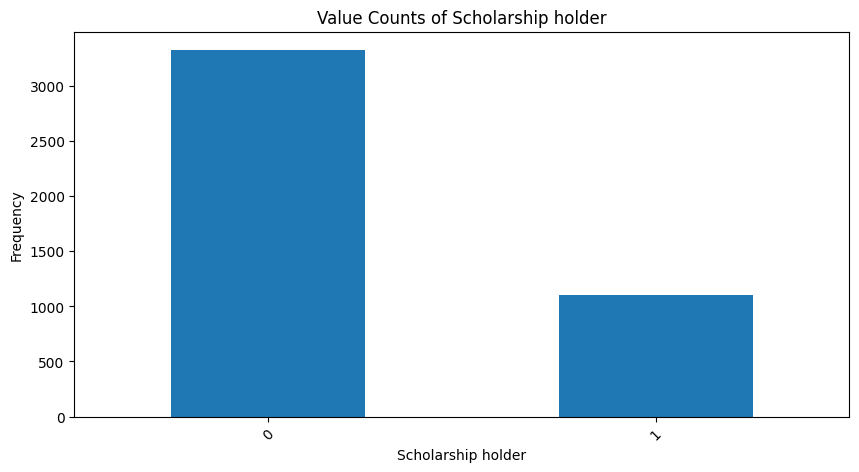

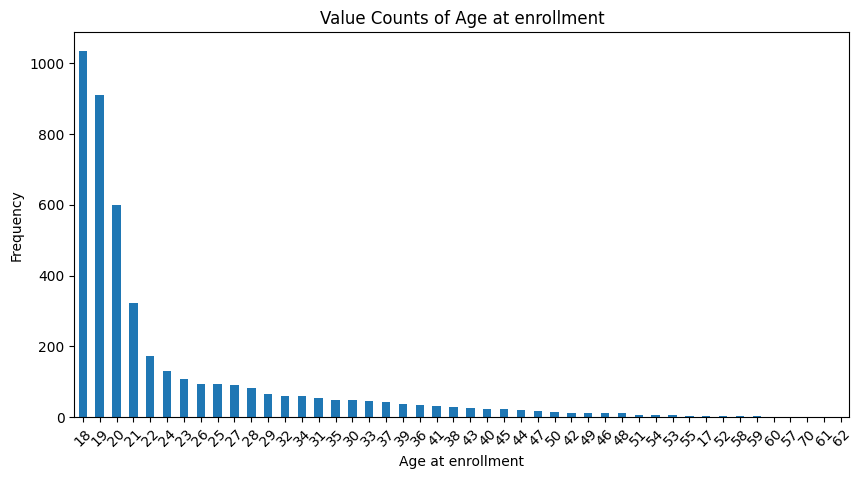

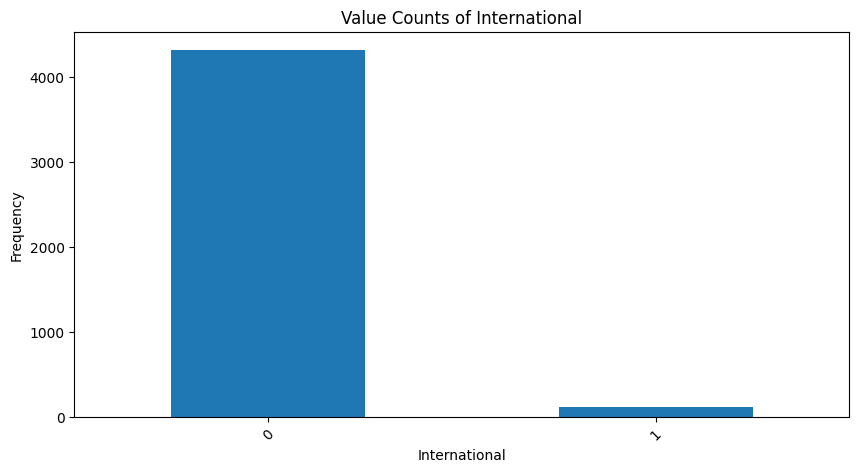

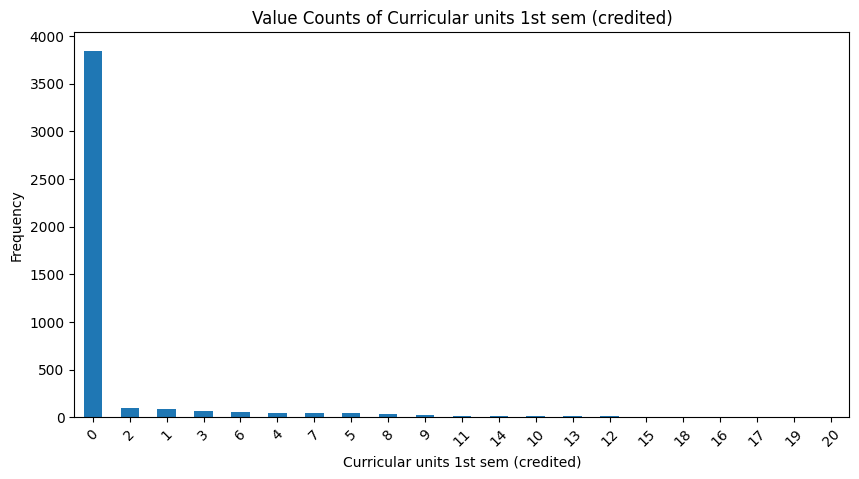

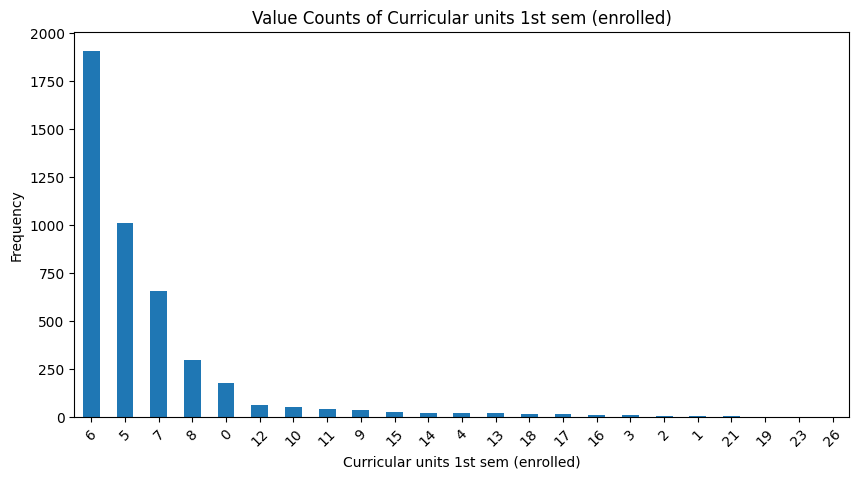

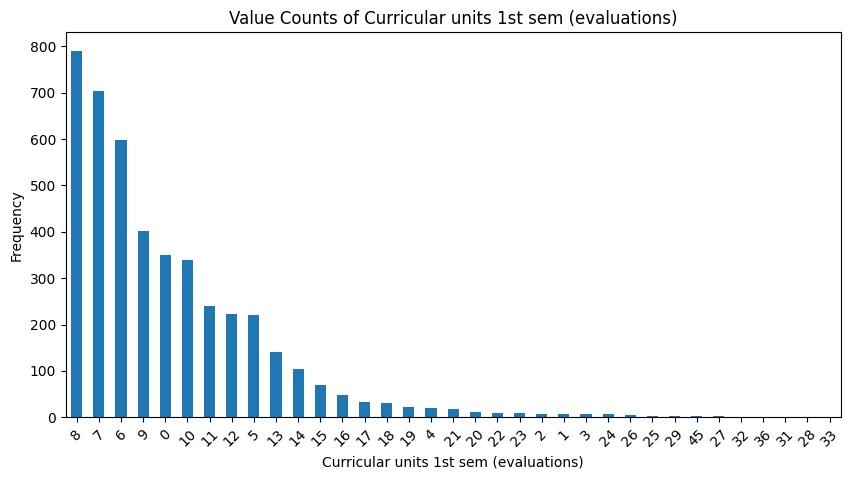

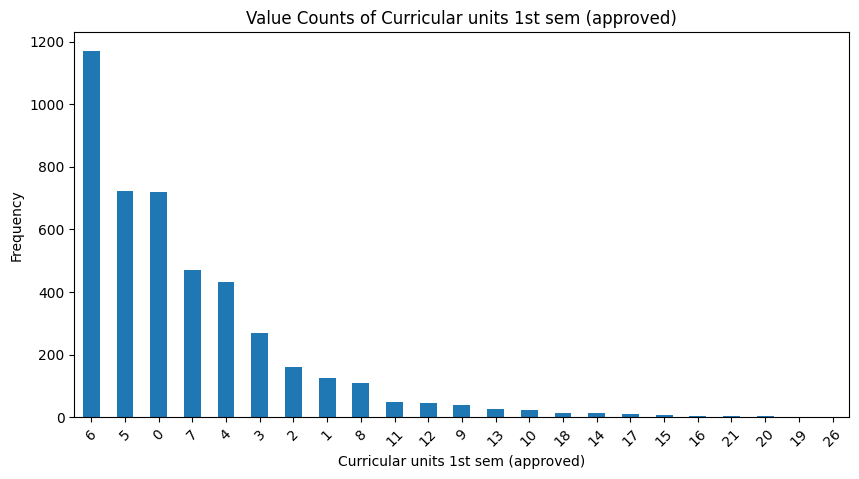

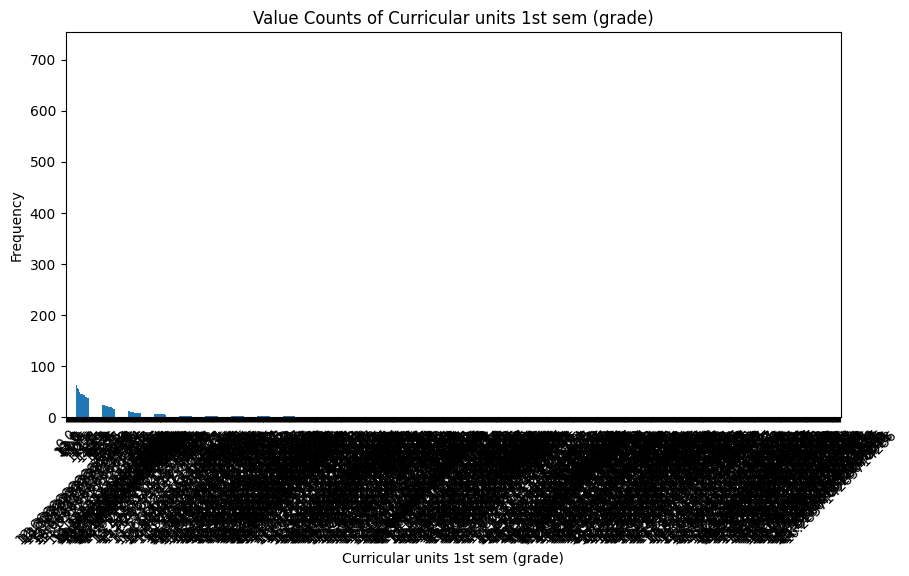

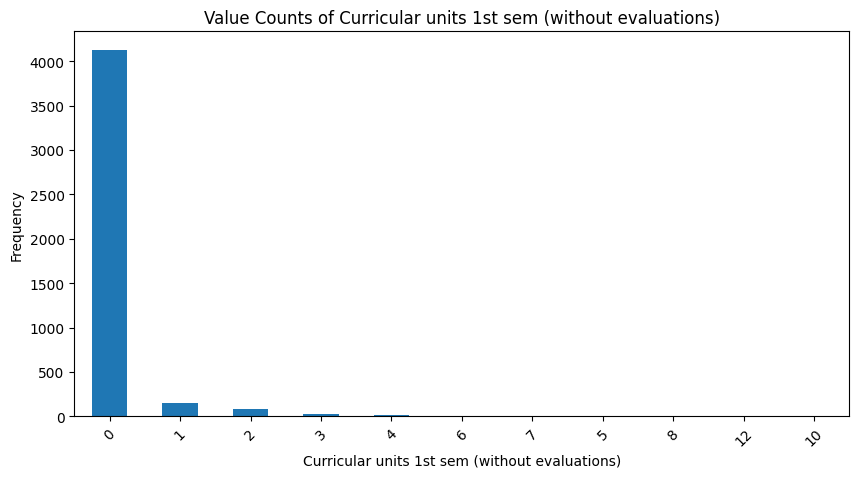

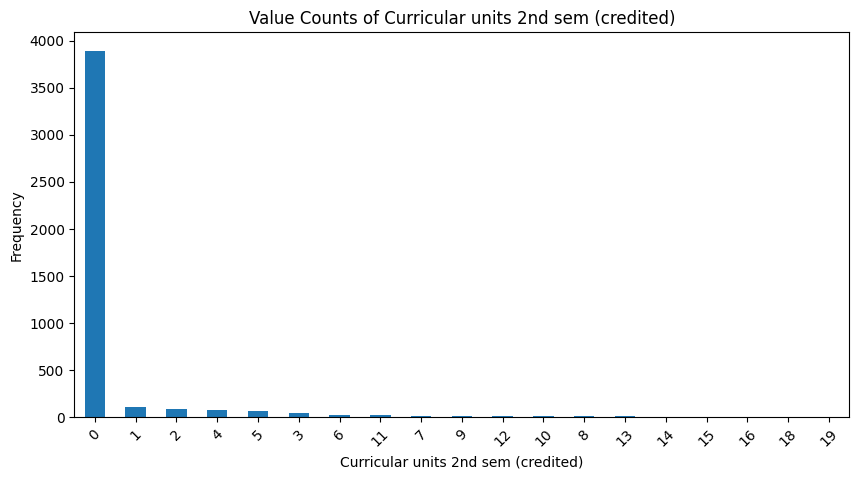

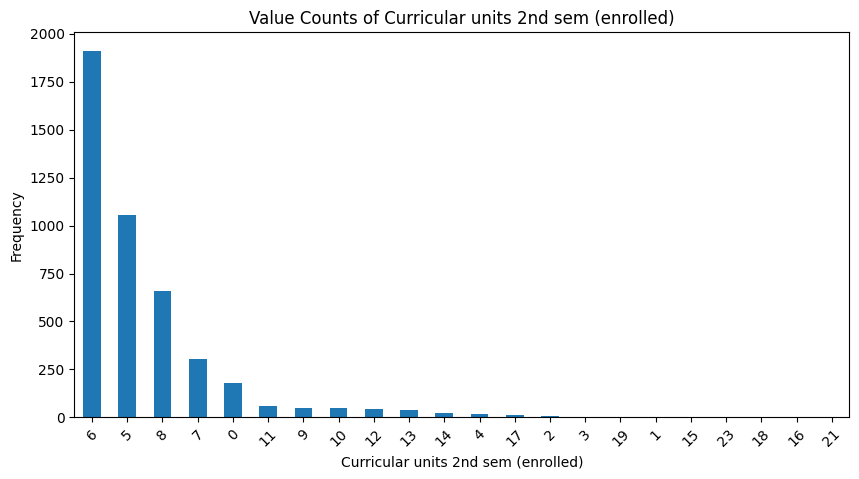

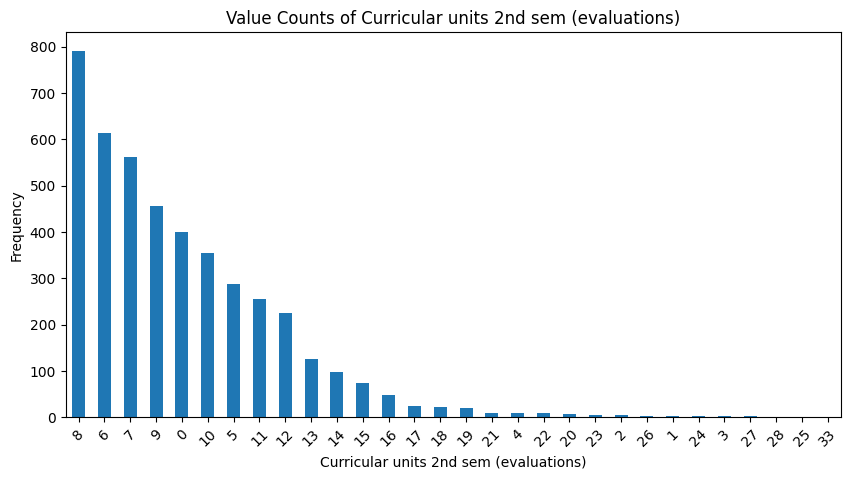

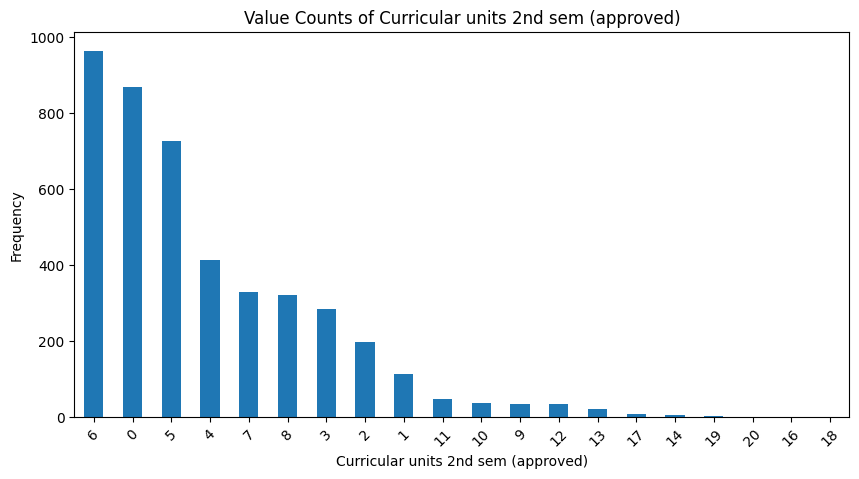

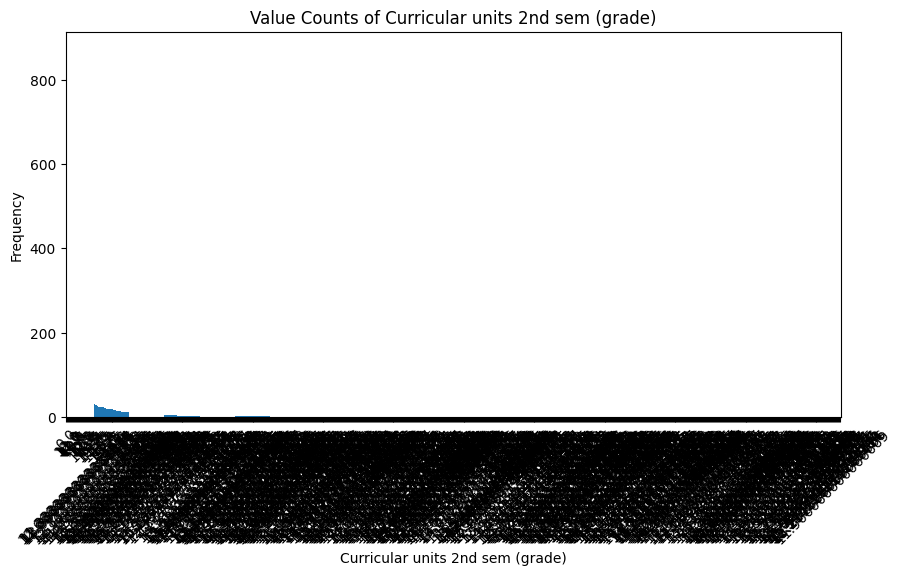

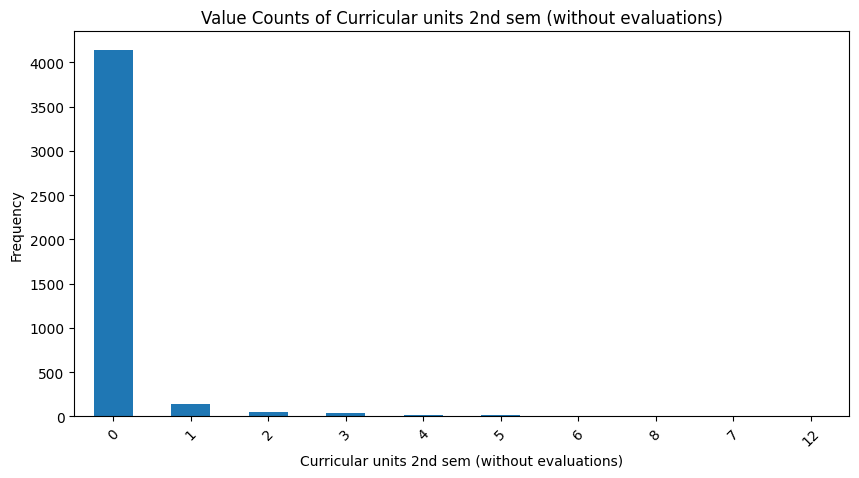

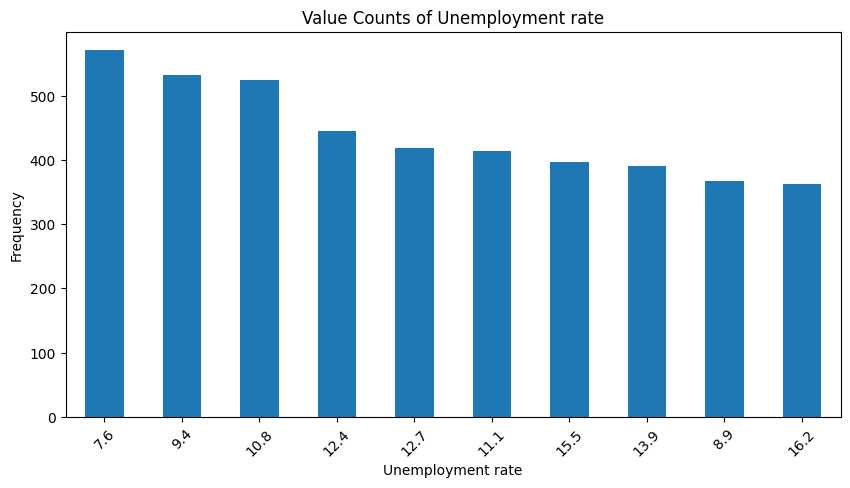

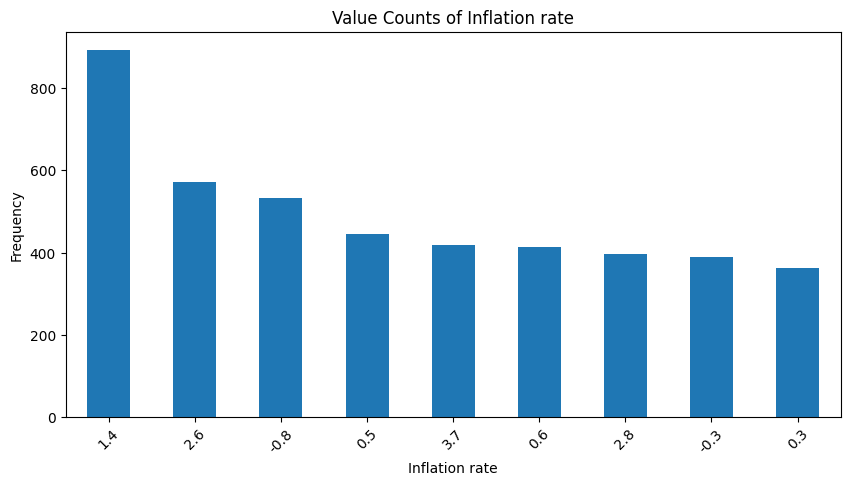

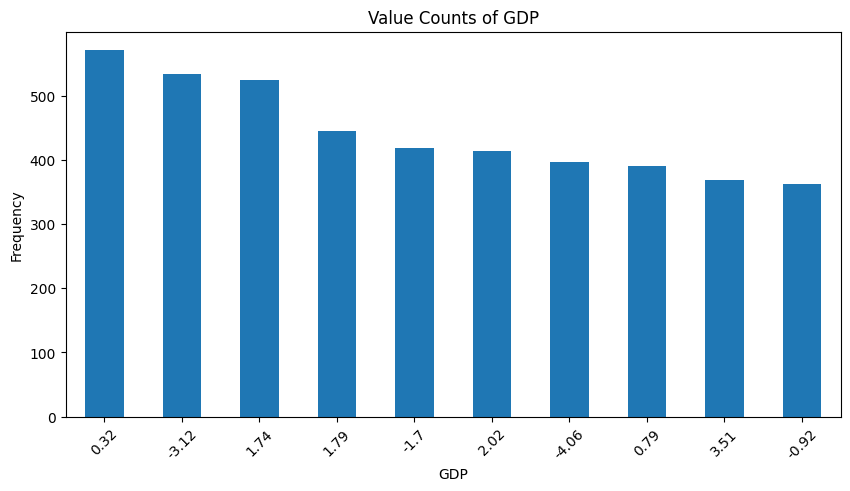

In [6]:
# since our data is already in numerical form, we can cluster data
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot value counts for all numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    df[column].value_counts().plot(kind='bar')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Value Counts of {column}')
    plt.xticks(rotation=45)
    plt.show()

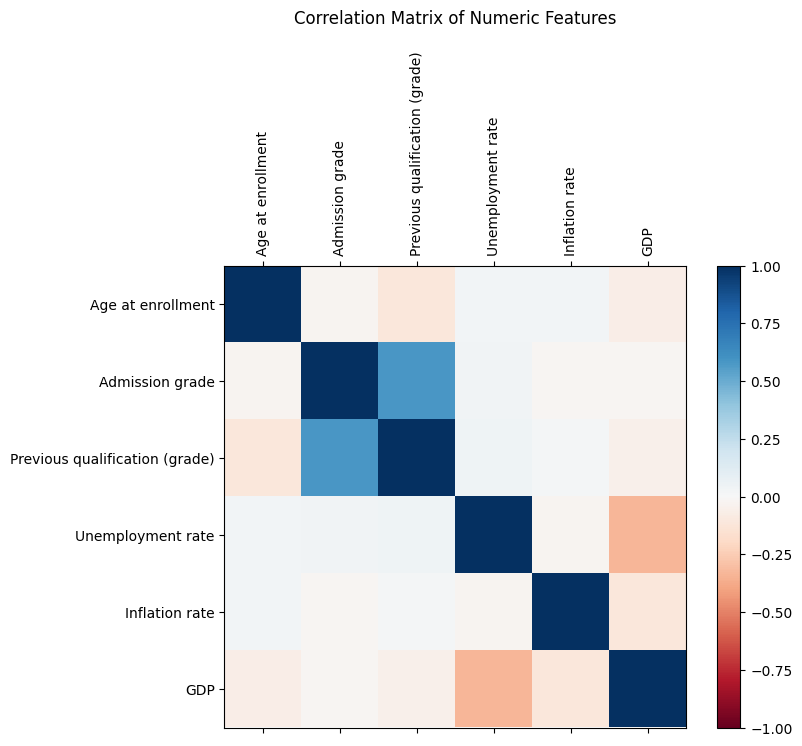

In [15]:
# Define numeric columns (update as needed)
numeric_cols = ['Age at enrollment', 'Admission grade', 'Previous qualification (grade)',
                'Unemployment rate', 'Inflation rate', 'GDP']

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr().values

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Use 'coolwarm' colormap for better contrast (or try 'RdBu', 'viridis', or 'Spectral')
cax = ax.matshow(corr_matrix, cmap='RdBu', vmin=-1, vmax=1)

# Add color bar
fig.colorbar(cax)

# Set axis ticks and labels
ax.set_xticks(np.arange(len(numeric_cols)))
ax.set_yticks(np.arange(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=90)
ax.set_yticklabels(numeric_cols)

# Add title
plt.title('Correlation Matrix of Numeric Features', pad=20)

# Show the plot
plt.show()

C:\Users\joack\AppData\Local\Temp\ipykernel_15660\2915739159.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=['Dropped out','Enrolled','Graduated'])


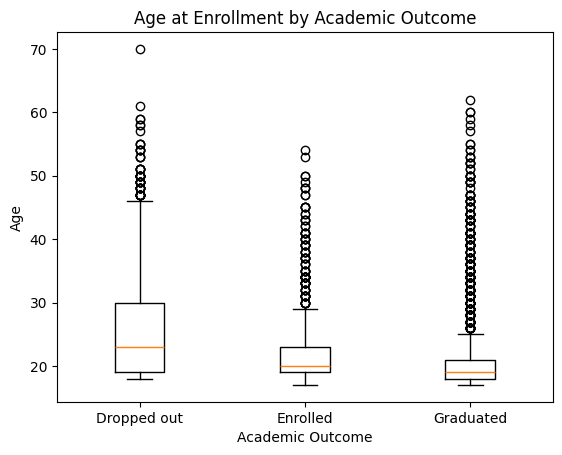

In [12]:
import matplotlib.pyplot as plt

outcomes = [0, 1, 2]  # dropped out, enrolled, graduated
data_for_boxplot = [df.loc[df['Target'] == t, 'Age at enrollment'] for t in outcomes]

plt.boxplot(data_for_boxplot, labels=['Dropped out','Enrolled','Graduated'])
plt.title('Age at Enrollment by Academic Outcome')
plt.xlabel('Academic Outcome')
plt.ylabel('Age')
plt.show()


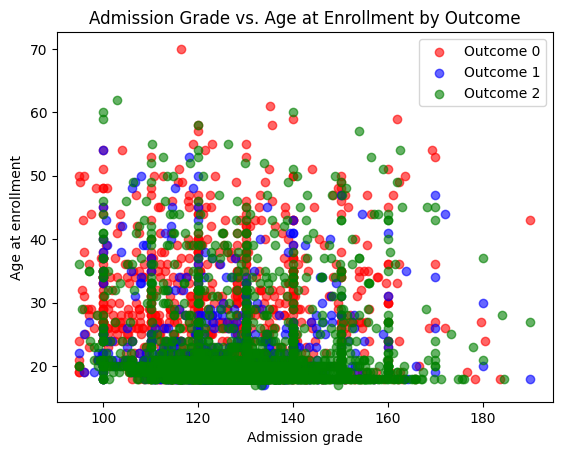

In [13]:
colors = {0: 'red', 1: 'blue', 2: 'green'}  # example mapping if your target codes are 0,1,2

fig, ax = plt.subplots()
for outcome in [0,1,2]:
    subset = df[df['Target'] == outcome]
    ax.scatter(subset['Admission grade'], subset['Age at enrollment'],
               label=f"Outcome {outcome}",
               color=colors[outcome],
               alpha=0.6) 
ax.set_xlabel('Admission grade')
ax.set_ylabel('Age at enrollment')
ax.set_title('Admission Grade vs. Age at Enrollment by Outcome')
ax.legend()
plt.show()


C:\Users\joack\AppData\Local\Temp\ipykernel_15660\3094960513.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=['Dropout','Enrolled','Graduated'])


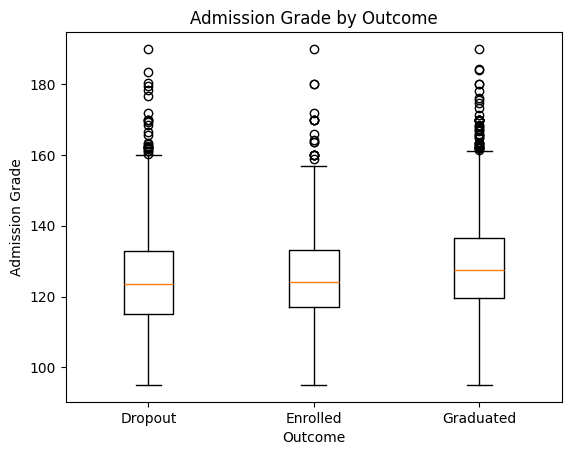

In [14]:
targets = [0, 1, 2]  # 0=Dropout, 1=Enrolled, 2=Graduated
data_for_boxplot = [df.loc[df['Target'] == t, 'Admission grade'] for t in targets]

plt.boxplot(data_for_boxplot, labels=['Dropout','Enrolled','Graduated'])
plt.title('Admission Grade by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Admission Grade')
plt.show()


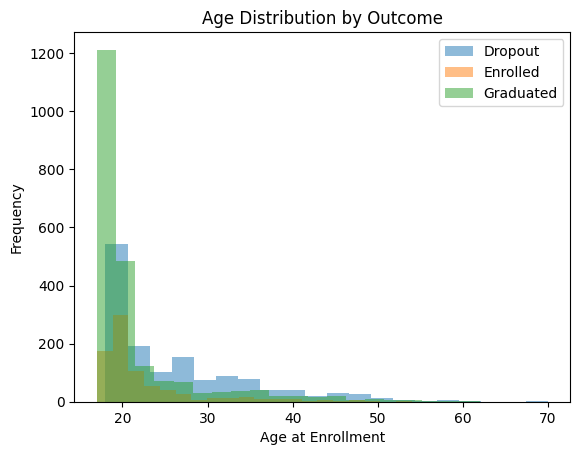

In [16]:
plt.hist(df.loc[df['Target'] == 0, 'Age at enrollment'], bins=20, alpha=0.5, label='Dropout')
plt.hist(df.loc[df['Target'] == 1, 'Age at enrollment'], bins=20, alpha=0.5, label='Enrolled')
plt.hist(df.loc[df['Target'] == 2, 'Age at enrollment'], bins=20, alpha=0.5, label='Graduated')
plt.xlabel('Age at Enrollment')
plt.ylabel('Frequency')
plt.title('Age Distribution by Outcome')
plt.legend()
plt.show()
